# Normal distribution

Terms:  
* L2 norm := Euclidian distance of point to origin = sqrt of sum of X & Y sqared.  
* Mahalanobis distance := from point to distribution (multivariate gaussian).  
* Central Limit Theorem := mean approximates the normal distribution for any sufficiently large set of independent random variables, regardless of their distributions. 

Links:  
* Penn State University stat[505](https://online.stat.psu.edu/stat505/book/export/html/636)

## Univariate Gaussian PDF
$X \sim \mathcal{N} (\mu,\sigma)=(\frac{1}{\sigma \sqrt(2\pi)})e^{[\frac{-1}{2}(\frac{X-\mu}{\sigma})^2]}$  
Random variable X is distributed according to the distribution N
having parameters mean and standard deviation.

In [1]:
import math
def univariate_gaussian_prob(X,mean,std):
    constant = 1/((std**2)*math.sqrt(2*math.pi))
    exponent = (X-mean)/std
    exponent = (-1/2) * exponent**2
    prob = constant * math.exp(exponent)
    return prob
def show_ugp(X,mean,std):
    print("P(%d|mean=%d,std=%d)=%f"%(X,mean,std,univariate_gaussian_prob(X,mean,std)))

In [2]:
# Prob drops as distance from mean increases
show_ugp(5,5,1)
show_ugp(4,5,1)
show_ugp(6,5,1)
show_ugp(3,5,1)

P(5|mean=5,std=1)=0.398942
P(4|mean=5,std=1)=0.241971
P(6|mean=5,std=1)=0.241971
P(3|mean=5,std=1)=0.053991


In [3]:
# Prob drops as variance increases
show_ugp(5,5,1)
show_ugp(5,5,2)
show_ugp(5,5,3)


P(5|mean=5,std=1)=0.398942
P(5|mean=5,std=2)=0.099736
P(5|mean=5,std=3)=0.044327


### Using numpy
Deprecated: numpy.linalg.norm  

Supported: numpy.random.normal   
Supported: numpy.random.Generator.normal  
Supported: numpy.random.default_rng().normal  

np.normal(mu, sigma, size) # size can be like 1000 or like (2,5)

Link: [AlphaCodingSkills](https://www.alphacodingskills.com/numpy/numpy-normal-distribution.php)

In [4]:
import scipy as sp
from scipy import stats # pdf and cdf functions
import numpy as np
from numpy.random import normal  # random number generators
import matplotlib.pyplot as plt

In [5]:
data = normal(10,1,5)
data  # random numbers with mean = 10

array([ 9.82185066,  9.43024369, 10.46787398,  9.81492071,  9.25181463])

In [6]:
theoretical_mean=10
theoretical_std=1
observations=5000
data = normal(theoretical_mean,theoretical_std,observations)
sample_mean = np.mean(data)
sample_std = np.std(data)
print("Observed mean",sample_mean,"std",sample_std)

Observed mean 9.99939498791508 std 1.00639439048934


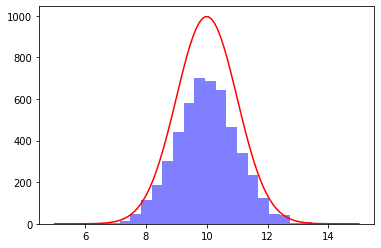

In [7]:
num_bins = 20
x = np.linspace(5,15,100)  # Xmin, Xmax, num points
fudge=0.5 # probabilities are mirrored above & below the mean
plt.plot(x, fudge*observations*stats.norm.pdf(x, theoretical_mean, theoretical_std),color='red')
plt.hist(data, bins=num_bins, facecolor='blue', alpha=0.5)
plt.show()

In [66]:
# use numpy.random.Generator.multivariate_normal
mean = (1, 2)
cov = [[1, 0], [0, 1]]
rng = np.random.default_rng()
x = rng.multivariate_normal(mean, cov, (3, 3))
x.shape

(3, 3, 2)

In [69]:
# generate random points
from scipy.stats import multivariate_normal
x = np.linspace(0, 5, 10, endpoint=False)
y = multivariate_normal.pdf(x, mean=2.5, cov=0.5)
y

array([0.00108914, 0.01033349, 0.05946514, 0.20755375, 0.43939129,
       0.56418958, 0.43939129, 0.20755375, 0.05946514, 0.01033349])

In [68]:
# compute probability of a point
from scipy.stats import norm
mean = 100
std = 12
print( "pdf(98)=",norm(mean,std).pdf(98) )
print( "cdf(98)=",norm(mean,std).cdf(98) )

pdf(98)= 0.032786643008494994
cdf(98)= 0.43381616738909634


## Multivariate Gaussian PDF
In the above, X and $\mu$ were scalar i.e. dimension D=1. 
Rewrite univariate distribution as function of mean and variance.

$X \sim \mathcal{N} (\mu,\sigma^2)=(\frac{1}{\sqrt{\sigma^2} * \sqrt(2\pi)})e^{[\frac{-1}{2} * \frac{(X-\mu)*(X-\mu)}{\sigma^2}]}$

Next make X and $\mu$ vectors with D>1 dimensions. 
Substitute covariance matrix $\Sigma$ for variance $\sigma$. 
Use the determinant under the square root. 
Use the inverse for matrix multiplication.
Note dimensions D: above, D=1 was omitted but here D>1.

$\bar X \sim \mathcal{N} (\bar \mu,\Sigma)=(\frac{1}{\sqrt{|\Sigma|} * \sqrt((2\pi)^D)})e^{[\frac{-1}{2} * (\bar X - \bar \mu)^{T}*\Sigma^{-1}*(\bar X - \bar \mu)]}$  

## Covariance matrix
Variance is computed over n samples.  
Variance:  
$\sigma^2(X) = (1/n)\sum_1^n[(\mu-x)^2]$  
Covariance:   
$\sigma(X,Y) = (1/n)\sum_1^n[(\mu_{x}-x)(\mu_{y}-y)]$  
Covariance matrix:  
It is a symmetric matrix 
with diagonal elements = Variance(X), 
and off-diagonals = Covariance(X,Y).
The covariance matrix is similar to but not the same as the correlation matrix!
Data tight on the diagonal has correlations close to 1 but covariances close to the variances.

    Matrix   Circle  WideElipse  TallElips  DiagonalElipse
    XX  XY    1 0     2 0         1 0        1 2
    YX  YY    0 1     0 1         0 2        2 1

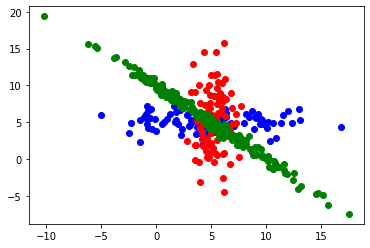

In [8]:
from scipy.stats import multivariate_normal
# numpy.random.multivariate_normal

means = np.array([5,5])
cov1 = np.array([[20, 0], [0, 1]]) # blue : high X variance
cov2 = np.array([[1, 0], [0, 20]]) # red : high Y variance
cov3 = np.array([[20, -19.9], [-19.9, 20]])  # green : covariance close to variance
data1 = multivariate_normal.rvs(means, cov1, 100)
data2 = multivariate_normal.rvs(means, cov2, 100)
data3 = multivariate_normal.rvs(means, cov3, 200)
plt.scatter(data1[:,0],data1[:,1],color='blue')
plt.scatter(data2[:,0],data2[:,1],color='red')
plt.scatter(data3[:,0],data3[:,1],color='green')
plt.show()

### Easy case: 2 variables, 2x2 covariance
The computation gets harder with larger matrices 
because it requires matrix inverse and matrix determinant.

[StackOverflow](https://stackoverflow.com/questions/17428621/python-differentiating-between-row-and-column-vectors) on numpy array transpose. Numpy vectors are not inherently row-vectors or column vectors. Numpy transposes them as needed. So np.transpose(2x3matrix) returns a (3x2matrix), np.transpose(vector) is a no-op, but np.dot(np.transpose) handles the transpose correctly. 

In [39]:
mylist = [1,2,3]
myvector = np.array(mylist)
print("original=",myvector,"transpose=",np.transpose(myvector),
      "dot product:",myvector.dot(np.transpose(myvector)))
print("Same result without the transpose:",myvector.dot(myvector))

original= [1 2 3] transpose= [1 2 3] dot product: 14
Same result without the transpose: 14


In [17]:
def roll_matrix(a,b,c,d):
    M = np.zeros((2,2))
    M[0,0] = a
    M[0,1] = b
    M[1,0] = c
    M[1,1] = d
    return M
def unroll_matrix(M):
    a = M[0,0]
    b = M[0,1]
    c = M[1,0]
    d = M[1,1]
    return a,b,c,d
def determinant(M):
    a,b,c,d = unroll_matrix(M)
    det = a*d - b*c
    return det
def inverse(M):
    det = determinant(M)
    if det==0:
        return None
    denominator = 1 / det
    tup = unroll_matrix(M)
    a,b,c,d = tuple(t/denominator for t in tup) 
    IM = roll_matrix(d,-b,-c,a)
    return IM

In [44]:
def mahalanobis_distance(X,means,cov):
    inv = inverse(cov) # inverse: 2x2 matrix
    dev = np.subtract(X,means) # X - mu elementwise vector subtraction
    prod = dev.dot(inv).dot(dev)
    return prod
def multivariate_gaussian_prob(X,means,cov):
    """" X:1x2, means:1x2, covariance:2x2"""
    det = determinant(cov) # determinant: scalar
    constant = 1/(math.sqrt(det)*2*math.pi) # scalar. Note sqrt 2pi sqaured = 2pi
    md = mahalanobis_distance(X,means,cov)
    exponent = (-1/2)*md
    prob = constant * math.exp(exponent)
    return prob

In [58]:
means = np.asarray( (5,3) )
cov = roll_matrix(10,3,3,1)
X = np.asarray( (5,3) )   
print(multivariate_gaussian_prob(X,means,cov),"Point at dead center")

0.15915494309189535 Point at dead center


In [59]:
X = np.asarray( (6,3) ) 
print(multivariate_gaussian_prob(X,means,cov),"Point at Y center, wandering X")

0.09653235263005391 Point at Y center, wandering X


In [60]:
X = np.asarray( (5,4) )  
print(multivariate_gaussian_prob(X,means,cov),"Point X center, extreme Y")

0.0010723775711956546 Point X center, extreme Y


### Using numpy
Link: 

In [71]:
from scipy.stats import multivariate_normal
var = multivariate_normal(mean=[0,0], cov=[[1,0],[0,1]])
var.pdf([1,0])

0.09653235263005393

In [73]:
var = multivariate_normal(mean=[5,3], cov=[[10,3],[3,1]])
print(var.pdf([5,3]), "Point at dead center")

0.1591549430918954 Point at dead center
